In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
from mpl_toolkits import mplot3d
from math import sqrt
import warnings

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder, MinMaxScaler


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams["savefig.format"] = 'tiff'
warnings.filterwarnings("ignore")

In [2]:
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=2)


In [3]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 160:
    return lr
  else:
    return lr * np.exp(-0.1)

callback = keras.callbacks.LearningRateScheduler(scheduler)



# Neural Network
def Neural_network():
    init = keras.initializers.random_normal()
    model=Sequential()
    model.add(layers.Dense(64,activation='relu',kernel_initializer=init, input_dim=scaled_DF.shape[1]))
    model.add(layers.Dropout(0.1))
    

    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(1,kernel_initializer=init,activation = 'linear'))
 
    
    optimize=tf.keras.optimizers.Adam()
    
    model.compile(optimizer=optimize,
                    loss='mse',
                    )
    return model


In [4]:
# Funtion to train the model
def training_model(X_train,Y_train,model):
    history=model.fit(X_train,Y_train,epochs=200,batch_size=64,verbose=0,callbacks=[callback])
    return history

In [5]:
# To print losses
def plots():
    f, ax = plt.subplots(1,1)
    actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
    predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

    actual=np.array(scaler.inverse_transform(np.array(trainY).reshape(-1,1)))
    predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))


    plt.scatter(actual_test,predicted_test, color='blue', label='Test') #linewidths=0.5, edgecolors='orange')
    sns.regplot(actual,predicted, color='lightcoral', label='Train')

    print("Mean absolute error (MAE):      %f" % mean_absolute_error(actual_test,predicted_test))
    print("Mean squared error (MSE):       %f" % mean_squared_error(actual_test,predicted_test))
    print("Root mean squared error (RMSE): %f" % sqrt(mean_squared_error(actual_test,predicted_test)))
    print("R square (R^2):                 %f" % r2_score(actual_test,predicted_test))
    
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    #plt.suptitle("Actual Vs Predicted")
    anchored_text = AnchoredText("R\u00b2 Score_train  "+str(round(r2_score(actual,predicted),3))+'\n'"R\u00b2 Score_test  "+str(round(r2_score(actual_test,predicted_test),3)), loc=2,prop=dict(size=15))
    ax.add_artist(anchored_text)
    
    plt.legend(loc = 9, prop={'size': 15}) 
    plt.tight_layout()
    plt.savefig(str(model)[1:6], bbox_inches='tight')
    plt.show()

In [6]:
def defining_model(x):
    if x == 'mlr':
      model = LinearRegression()
    elif x=='adboost':
      model = AdaBoostRegressor()
    elif x=='pls':
      model = PLSRegression()
    elif x=='rndmfrst':
      model = RandomForestRegressor()
    elif x=='knn':
      model = KNeighborsRegressor()
    elif x=='svr':
      model = SVR()
    else:
      print("wrong selection")
    return model



In [7]:
# Getting data from CSV file
Train = pd.read_excel('Train.xlsx')
Test = pd.read_excel('Test.xlsx')
display(Train)
display(Test)

,Name of the Reagent,Smiles,Type of Reagent,Reagent ID Number,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,MeCN,229.6,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
1,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,DCM,242.4,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
2,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,MeCN,231.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
3,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,DCM,244.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
4,N-fluoro-4-methyl-N-(phenylsulfonyl)benzenesul...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(C)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1c,MeCN,230.3,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,"(1R,2R,4S,5S)-2-((S)-acetoxy(6-methoxyquinolin...",F[N@+]1(C[C@H]2CC)[C@@H]([C@@H](OC(C)=O)C3=C(C...,N-Fluoroammoniums,F6c,DCM,250.7,22.034198,0,1,2.555561,...,0.086957,0.045000,0.049444,0.029684,0.018022,0.018353,0.012311,0.007049,0.010597,1.000000
216,Dinitrogen Fluoride,N#[N+]F,N-Fluoroammoniums,F7,MeCN,110.9,1.414214,0,1,1.414214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
217,Dinitrogen Fluoride,N#[N+]F,N-Fluoroammoniums,F7,DCM,112.3,1.414214,0,1,1.414214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
218,Ammonium Fluoride,F[N+](F)(F)F,N-Fluoroammoniums,F8,MeCN,150.9,3.464102,0,1,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


,Name of the Reagent,Smiles,Type of Reagent,Reagent ID Number,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,4-bromo-N-fluoro-N-(phenylsulfonyl)benzenesulf...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1f,MeCN,228.3,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
1,4-bromo-N-fluoro-N-(phenylsulfonyl)benzenesulf...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1f,DCM,240.9,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
2,4-(tert-butyl)-N-((4-(tert-butyl)phenyl)sulfon...,O=S(C1=CC=C(C(C)(C)C)C=C1)(N(S(C2=CC=C(C(C)(C)...,N-Fluorosulfonimides,A1k,MeCN,231.4,21.835015,0,0,2.495940,...,0.137116,0.072500,0.041877,0.048203,0.031888,0.013310,0.018334,0.010096,0.009723,1.000000
3,4-(tert-butyl)-N-((4-(tert-butyl)phenyl)sulfon...,O=S(C1=CC=C(C(C)(C)C)C=C1)(N(S(C2=CC=C(C(C)(C)...,N-Fluorosulfonimides,A1k,DCM,244.2,21.835015,0,0,2.495940,...,0.137116,0.072500,0.041877,0.048203,0.031888,0.013310,0.018334,0.010096,0.009723,1.000000
4,4-bromo-N-((4-bromophenyl)sulfonyl)-N-fluorobe...,O=S(C1=CC=C(Br)C=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=...,N-Fluorosulfonimides,A1n,MeCN,227.2,16.980862,0,0,2.484579,...,0.133333,0.069079,0.049832,0.045139,0.017268,0.016204,0.009358,0.012812,0.006612,1.000000
5,4-bromo-N-((4-bromophenyl)sulfonyl)-N-fluorobe...,O=S(C1=CC=C(Br)C=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=...,N-Fluorosulfonimides,A1n,DCM,239.5,16.980862,0,0,2.484579,...,0.133333,0.069079,0.049832,0.045139,0.017268,0.016204,0.009358,0.012812,0.006612,1.000000
6,"2-fluoro-2H-benzo[d][1,3,2]dithiazole 1,1,3,3-...",FN1S(C2=CC=CC=C2S1(=O)=O)(=O)=O,N-Fluorosulfonimides,A2,MeCN,224.2,11.064788,0,0,2.595309,...,0.142222,0.117798,0.030154,0.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
7,"2-fluoro-2H-benzo[d][1,3,2]dithiazole 1,1,3,3-...",FN1S(C2=CC=CC=C2S1(=O)=O)(=O)=O,N-Fluorosulfonimides,A2,DCM,235.8,11.064788,0,0,2.595309,...,0.142222,0.117798,0.030154,0.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
8,"perfluoro-1,3,2-dithiazinane 1,1,3,3-tetraoxide",FN(S(=O)(C(F)(C(F)(C(F)1F)F)F)=O)S1(=O)=O,N-Fluorosulfonimides,A5b,MeCN,200.2,13.217235,0,0,2.691081,...,0.215488,0.087500,0.065233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
9,"perfluoro-1,3,2-dithiazinane 1,1,3,3-tetraoxide",FN(S(=O)(C(F)(C(F)(C(F)1F)F)F)=O)S1(=O)=O,N-Fluorosulfonimides,A5b,DCM,211.5,13.217235,0,0,2.691081,...,0.215488,0.087500,0.065233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000


In [8]:
# Combine Train and test for feature engineering
DF = pd.concat([Train,Test],ignore_index=True)
DF_data = DF.copy()
DF

,Name of the Reagent,Smiles,Type of Reagent,Reagent ID Number,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,MeCN,229.6,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
1,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,DCM,242.4,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
2,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,MeCN,231.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
3,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,DCM,244.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
4,N-fluoro-4-methyl-N-(phenylsulfonyl)benzenesul...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(C)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1c,MeCN,230.3,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,"1-fluoro-4-hydroxy-1,4-diazabicyclo[2.2.2]octa...",F[N+]1(CC2)CC[N+]2(O)CC1,N-Fluoroammoniums,F1b,DCM,222.3,8.096012,0,2,2.460505,...,0.111111,0.028846,0.262222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
256,"(1S,2S,4S)-1-fluoro-4-methyl-2,3-diphenyl-1,4-...",F[N@+]1(CC2)CC[N@+]2(C)C(C3=CC=CC=C3)[C@@H]1C4...,N-Fluoroammoniums,F2a,MeCN,230.1,17.750967,0,2,2.614028,...,0.093567,0.062500,0.052398,0.021680,0.014694,0.007440,0.008062,0.000000,0.000000,0.800000
257,"(1S,2S,4S)-1-fluoro-4-methyl-2,3-diphenyl-1,4-...",F[N@+]1(CC2)CC[N@+]2(C)C(C3=CC=CC=C3)[C@@H]1C4...,N-Fluoroammoniums,F2a,DCM,226.8,17.750967,0,2,2.614028,...,0.093567,0.062500,0.052398,0.021680,0.014694,0.007440,0.008062,0.000000,0.000000,0.800000
258,1-fluoroquinuclidin-1-ium,F[N+]1(CC2)CCC2CC1,N-Fluoroammoniums,F4,MeCN,252.9,7.229986,0,1,2.394170,...,0.088889,0.025000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333


In [10]:
# Removing Unwanted columns
DF_data=DF_data.drop(['Smiles','Name of the Reagent', 'Reagent ID Number' ],axis=1)
#DF_data

In [11]:
DF_data

,Type of Reagent,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,N-Fluorosulfonimides,MeCN,229.6,15.347868,0,0,2.478172,1.255132,12,0,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
1,N-Fluorosulfonimides,DCM,242.4,15.347868,0,0,2.478172,1.255132,12,0,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
2,N-Fluorosulfonimides,MeCN,231.2,16.762082,0,0,2.482426,1.251452,12,0,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
3,N-Fluorosulfonimides,DCM,244.2,16.762082,0,0,2.482426,1.251452,12,0,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
4,N-Fluorosulfonimides,MeCN,230.3,16.164365,0,0,2.481475,1.230844,12,0,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,N-Fluoroammoniums,DCM,222.3,8.096012,0,2,2.460505,1.279851,0,0,...,0.111111,0.028846,0.262222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
256,N-Fluoroammoniums,MeCN,230.1,17.750967,0,2,2.614028,1.346603,12,0,...,0.093567,0.062500,0.052398,0.021680,0.014694,0.007440,0.008062,0.000000,0.000000,0.800000
257,N-Fluoroammoniums,DCM,226.8,17.750967,0,2,2.614028,1.346603,12,0,...,0.093567,0.062500,0.052398,0.021680,0.014694,0.007440,0.008062,0.000000,0.000000,0.800000
258,N-Fluoroammoniums,MeCN,252.9,7.229986,0,1,2.394170,1.311143,0,0,...,0.088889,0.025000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333


In [12]:

# Scaling the whole DataFrame



scaler = StandardScaler()
scaled_DF = pd.DataFrame(scaler.fit_transform(DF_data.iloc[:,3:]))
scaled_DF.columns = DF_data.iloc[:,3:].columns

scaled_DF['FPD'] = scaler.fit_transform(np.array(DF_data['FPD']).reshape(-1,1))
scaled_DF

display(scaled_DF)

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,FPD
0,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309,-0.209117
1,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309,0.322217
2,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309,-0.142700
3,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309,0.396936
4,0.546294,-0.333333,-0.848205,0.237941,0.466145,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,0.278646,-0.180060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.764795,-0.333333,2.015864,0.122477,0.993371,-1.216100,-0.2,2.101587,-0.769701,1.131324,...,-1.465933,4.575128,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-0.415016,-0.512144
256,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.235675,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914,-0.188362
257,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.235675,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914,-0.325347
258,-0.905523,-0.333333,0.583829,-0.242769,1.330008,-1.216100,-0.2,2.101587,-1.251923,-0.598936,...,-1.606534,3.660802,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-1.802341,0.758078


In [13]:
DF_target = scaled_DF[['FPD']]
scaled_DF.drop('FPD',axis=1,inplace=True)

display(scaled_DF)
display(DF_target)

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309
1,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309
2,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309
3,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309
4,0.546294,-0.333333,-0.848205,0.237941,0.466145,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.209431,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,0.278646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.764795,-0.333333,2.015864,0.122477,0.993371,-1.216100,-0.2,2.101587,-0.769701,1.131324,...,-0.252921,-1.465933,4.575128,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-0.415016
256,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.734740,-0.235675,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914
257,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.734740,-0.235675,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914
258,-0.905523,-0.333333,0.583829,-0.242769,1.330008,-1.216100,-0.2,2.101587,-1.251923,-0.598936,...,-0.863225,-1.606534,3.660802,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-1.802341


,FPD
0,-0.209117
1,0.322217
2,-0.142700
3,0.396936
4,-0.180060
...,...
255,-0.512144
256,-0.188362
257,-0.325347
258,0.758078


In [14]:
scaled_DF[[ 'Solvent']] = DF_data[['Solvent']]

In [15]:
scaled_DF

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,Solvent
0,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309,MeCN
1,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309,DCM
2,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309,MeCN
3,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309,DCM
4,0.546294,-0.333333,-0.848205,0.237941,0.466145,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,0.278646,MeCN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.764795,-0.333333,2.015864,0.122477,0.993371,-1.216100,-0.2,2.101587,-0.769701,1.131324,...,-1.465933,4.575128,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-0.415016,DCM
256,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.235675,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914,MeCN
257,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.235675,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914,DCM
258,-0.905523,-0.333333,0.583829,-0.242769,1.330008,-1.216100,-0.2,2.101587,-1.251923,-0.598936,...,-1.606534,3.660802,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-1.802341,MeCN


In [16]:
scaled_DF[['Type of Reagent']] = DF_data[['Type of Reagent']]


In [17]:
scaled_DF

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,Solvent,Type of Reagent
0,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309,MeCN,N-Fluorosulfonimides
1,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.972309,DCM,N-Fluorosulfonimides
2,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309,MeCN,N-Fluorosulfonimides
3,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.972309,DCM,N-Fluorosulfonimides
4,0.546294,-0.333333,-0.848205,0.237941,0.466145,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,0.278646,MeCN,N-Fluorosulfonimides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.764795,-0.333333,2.015864,0.122477,0.993371,-1.216100,-0.2,2.101587,-0.769701,1.131324,...,4.575128,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-0.415016,DCM,N-Fluoroammoniums
256,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914,MeCN,N-Fluoroammoniums
257,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.221071,-0.394848,0.204100,0.051716,0.497782,-0.527199,-0.524982,0.139914,DCM,N-Fluoroammoniums
258,-0.905523,-0.333333,0.583829,-0.242769,1.330008,-1.216100,-0.2,2.101587,-1.251923,-0.598936,...,3.660802,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-1.802341,MeCN,N-Fluoroammoniums


In [18]:
scaled_DF = pd.get_dummies(scaled_DF)

In [19]:
scaled_DF

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI10,TopoShapeIndex,Solvent_DCM,Solvent_MeCN,Type of Reagent_N-Fluoroammoniums,Type of Reagent_N-Fluorocarboxamides,Type of Reagent_N-Fluoroheterocycles,Type of Reagent_N-Fluoropyridiniums,Type of Reagent_N-Fluorosulfonamides,Type of Reagent_N-Fluorosulfonimides
0,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,-0.524982,0.972309,0,1,0,0,0,0,0,1
1,0.413615,-0.333333,-0.848205,0.219753,0.727440,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,-0.524982,0.972309,1,0,0,0,0,0,0,1
2,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,0.831716,0.972309,0,1,0,0,0,0,0,1
3,0.643422,-0.333333,-0.848205,0.243174,0.687842,1.134725,-0.2,-0.475831,0.435855,-0.598936,...,0.831716,0.972309,1,0,0,0,0,0,0,1
4,0.546294,-0.333333,-0.848205,0.237941,0.466145,1.134725,-0.2,-0.475831,0.194744,-0.598936,...,1.736181,0.278646,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.764795,-0.333333,2.015864,0.122477,0.993371,-1.216100,-0.2,2.101587,-0.769701,1.131324,...,-0.524982,-0.415016,1,0,1,0,0,0,0,0
256,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.524982,0.139914,0,1,1,0,0,0,0,0
257,0.804114,-0.333333,2.015864,0.967791,1.711493,1.134725,-0.2,2.101587,-1.010812,1.131324,...,-0.524982,0.139914,1,0,1,0,0,0,0,0
258,-0.905523,-0.333333,0.583829,-0.242769,1.330008,-1.216100,-0.2,2.101587,-1.251923,-0.598936,...,-0.524982,-1.802341,0,1,1,0,0,0,0,0


In [20]:
trainX = scaled_DF[:len(Train)] 
testX = scaled_DF[len(Train):]

trainY = DF_target[:len(Train)]
testY = DF_target[len(Train):]

Average validation R2 score after crossvalidation :  -1.1886698524900066e+24
Average validation rmse score after crossvalidation :  13964779663477.115


Training Accuracy :  0.9870193011363795
Mean absolute error (MAE):      33106094328604.894531
Mean squared error (MSE):       3337476396488130555671478272.000000
Root mean squared error (RMSE): 57770895756324.656250
R square (R^2):                 -7544966246042199310467072.000000


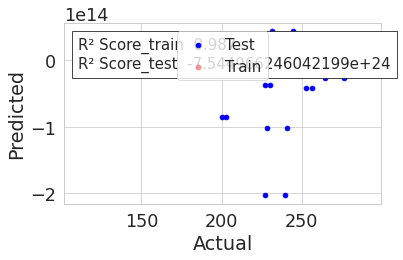

In [38]:
# Multiple Linear Regression
model = defining_model(x = 'mlr')

kfold = KFold(n_splits=5, shuffle=True, random_state=None)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'mlr')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.7023284242905264
Average validation rmse score after crossvalidation :  13.11374016490214


Training Accuracy :  0.8418465263063547
Mean absolute error (MAE):      7.431500
Mean squared error (MSE):       103.096690
Root mean squared error (RMSE): 10.153654
R square (R^2):                 0.766931


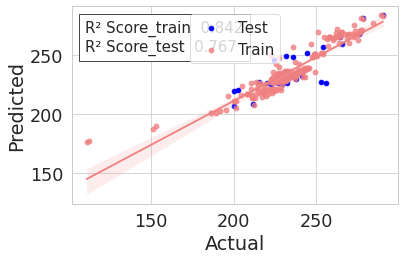

In [33]:
# KNN
model = defining_model(x = 'knn')

kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'knn')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.7584273768951284
Average validation rmse score after crossvalidation :  11.597923142036299


Training Accuracy :  0.9081977495091486
Mean absolute error (MAE):      7.236468
Mean squared error (MSE):       110.706137
Root mean squared error (RMSE): 10.521698
R square (R^2):                 0.749729


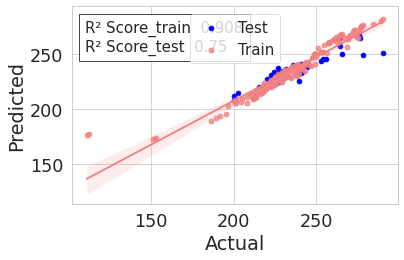

In [23]:
# Support Vector Regressor
model = defining_model(x = 'svr')

kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'svr')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.8300062588914798
Average validation rmse score after crossvalidation :  9.27585112389372


Training Accuracy :  0.9414509751842141
Mean absolute error (MAE):      6.554245
Mean squared error (MSE):       74.811276
Root mean squared error (RMSE): 8.649351
R square (R^2):                 0.830876


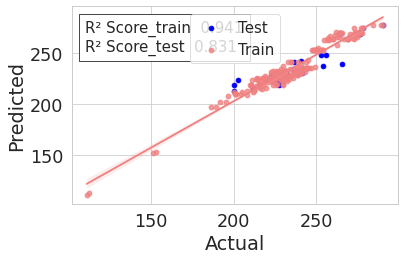

In [32]:
#Adaboost
model = defining_model(x = 'adboost')
kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'adboost')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.9151000836543975
Average validation rmse score after crossvalidation :  6.944308019362476


Training Accuracy :  0.9918206249312342
Mean absolute error (MAE):      6.686682
Mean squared error (MSE):       92.935155
Root mean squared error (RMSE): 9.640288
R square (R^2):                 0.789903


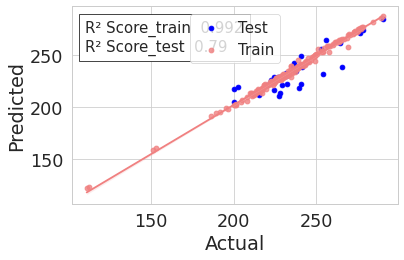

In [25]:
# Random Forest
model = defining_model(x = 'rndmfrst')
kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'rndmfrst')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

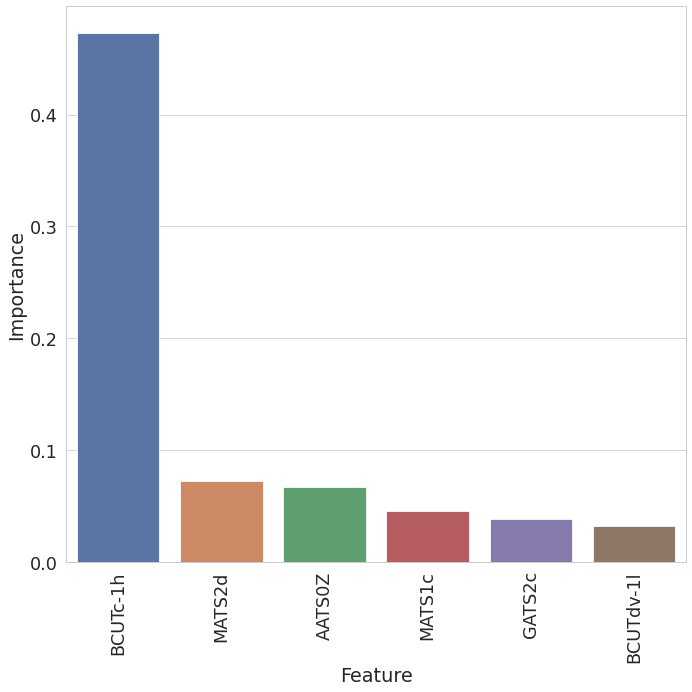

In [26]:
# get importance
importance = model.feature_importances_
# summarize feature importance
dicts = {
    'Feature':[x for x in trainX.columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=False)
DF_imp.to_excel('imp.xlsx', index=None)
# plot feature importance

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot('Feature','Importance',data = DF_imp.iloc[:6,:])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('import.tiff', dpi=600, bbox_inches = 'tight')
plt.show()

Average validation R2 score after crossvalidation :  0.7186854766456153
Average validation rmse score after crossvalidation :  12.653007032941213


Training Accuracy :  0.80729734500198
Mean absolute error (MAE):      9.662910
Mean squared error (MSE):       141.489747
Root mean squared error (RMSE): 11.894946
R square (R^2):                 0.680137


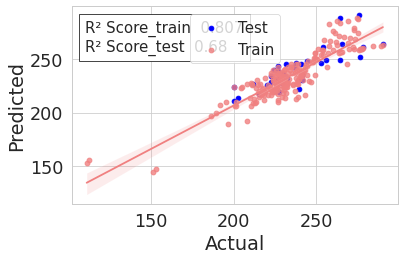

In [27]:
# Partial Least Square
model = defining_model(x = 'pls')

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'pls')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.9911827109261242
Average validation rmse score after crossvalidation :  1.8038833176297335


Training Accuracy :  0.998778673405542
Mean absolute error (MAE):      5.422431
Mean squared error (MSE):       49.018036
Root mean squared error (RMSE): 7.001288
R square (R^2):                 0.889186


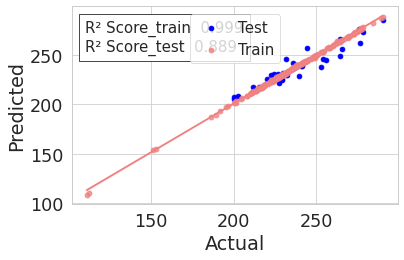

In [28]:
model = Neural_network()

kfold = KFold(n_splits=5, shuffle=True, random_state=None)

best_score = 0.1

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  training_model(trainX.iloc[train],trainY.iloc[train],model)
  scores.append(r2_score(trainY.iloc[valid],model.predict(trainX.iloc[valid])))
  
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
    
print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data

model = Neural_network()
training_model(trainX,trainY,model)
#actual = trainY
#predicted = model.predict(trainX)

actual=np.array(scaler.inverse_transform(np.array(trainY)))
predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))
model.save("nn.h5")
score = r2_score(actual,predicted)
print("\n\nTraining Accuracy : ",score) # Training Accuracy
plots()